In [16]:
import tensorflow as tf
from keras import layers,models,optimizers
from keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
dataset_url = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
data_dir = tf.keras.utils.get_file('cats_and_dogs.zip', origin=dataset_url, extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [ ]:
import os

data_dir=os.path.join(os.path.dirname(data_dir),"cats_and_dogs_filtered")

img_size=(160,160)
batch_size=32

train_dataset=image_dataset_from_directory(data_dir,validation_split=0.2,subset="training",seed=123,image_size=img_size,batch_size=batch_size)
validation_dataset=image_dataset_from_directory(data_dir,validation_split=0.2,subset="validation",seed=123,image_size=img_size,batch_size=batch_size)

Found 3000 files belonging to 2 classes.
Using 2400 files for training.
Found 3000 files belonging to 2 classes.
Using 600 files for validation.


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

In [ ]:
pretrained_model=tf.keras.applications.MobileNetV2(input_shape=(160,160,3),include_top=False,weights="imagenet")

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
pretrained_model.trainable = False

In [ ]:
model=models.Sequential(
   [ pretrained_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1)]
)

In [ ]:
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=["accuracy"])

In [17]:
model.summary()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_160 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_1 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [19]:
history = model.fit(train_dataset,
                    epochs=100,
                    validation_data=validation_dataset,
                    callbacks=[early_stopping])

Epoch 1/100
75/75 [==============================] - 3s 43ms/step - loss: 0.6256 - accuracy: 0.6679 - val_loss: 0.6662 - val_accuracy: 0.6500
Epoch 2/100
75/75 [==============================] - 5s 57ms/step - loss: 0.6241 - accuracy: 0.6679 - val_loss: 0.6661 - val_accuracy: 0.6517
Epoch 3/100
75/75 [==============================] - 4s 49ms/step - loss: 0.6228 - accuracy: 0.6675 - val_loss: 0.6659 - val_accuracy: 0.6533
Epoch 4/100
75/75 [==============================] - 4s 49ms/step - loss: 0.6216 - accuracy: 0.6671 - val_loss: 0.6654 - val_accuracy: 0.6517
Epoch 5/100
75/75 [==============================] - 4s 51ms/step - loss: 0.6207 - accuracy: 0.6683 - val_loss: 0.6651 - val_accuracy: 0.6517
Epoch 6/100
75/75 [==============================] - 3s 43ms/step - loss: 0.6195 - accuracy: 0.6683 - val_loss: 0.6667 - val_accuracy: 0.6533
Epoch 7/100
75/75 [==============================] - 3s 43ms/step - loss: 0.6176 - accuracy: 0.6687 - val_loss: 0.6643 - val_accuracy: 0.6533
Epoch 

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

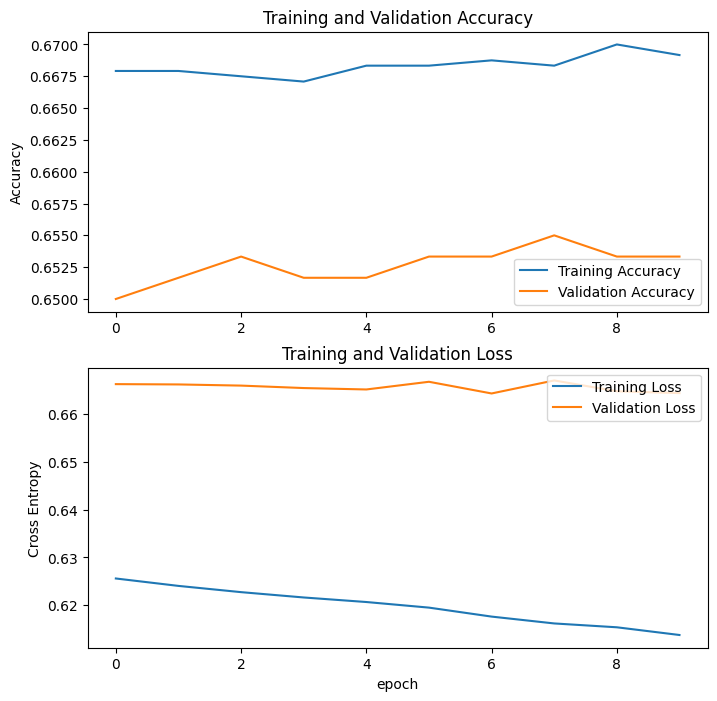

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [23]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


1/1 [==============================] - 0s 39ms/step
Cat


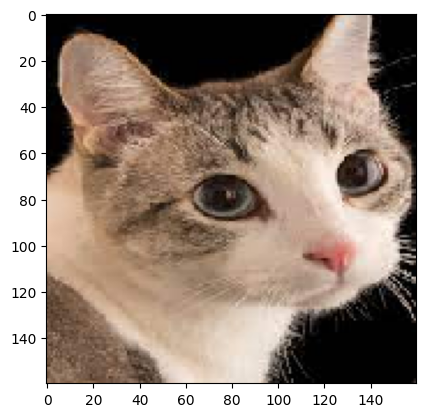

In [50]:
image_path="drive/MyDrive/cat.jpeg"
from keras.preprocessing import image

def load_preprocess_img(image_path):
  img=image.load_img(image_path,target_size=img_size)
  img_arr=image.img_to_array(img)
  img_arr/=255.0
  plt.imshow(img_arr)
  img_arr = np.expand_dims(img_arr, axis=0)

  return(img_arr)


def predict_image(model, img_path):
    # Preprocess the image
    img_array = load_preprocess_img(img_path)

    # Make predictions
    predictions = model.predict(img_array)


    # Decode the predictions to the original labels
    predicted_label = "Dog" if predictions[0] > 0 else "Cat"

    return predicted_label

print(predict_image(model,image_path))
